
# Ciência dos Dados - PROJETO 1

## David Fogelman


## Objetivo
O meu objetivo do projeto é definir a relção da escolaridade com o acesso da internet e a renda

## Como a renda e o grau de escolaridade influenciam no acesso á internet no estado de São Paulo para uma população abaixo de 72 anos?

https://tecnologia.uol.com.br/noticias/redacao/2015/04/29/ibge-renda-e-escolaridade-tem-relacao-direta-com-acesso-a-internet.htm

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline



print('Esperamos trabalhar no diretório')
print(os.getcwd())
print("ok")

Esperamos trabalhar no diretório
E:\Semestre 2\Ciência dos Dados\Projetos\InsperEng-CD
ok


In [197]:
dados = pd.read_csv('Dados_selecionados.csv')

lista = ["UF", "V8005", "V06111", "V4750", "V4745"]
dados = dados.loc[:,lista]

In [204]:
dados_not_null = dados[pd.notnull(dados.UF)&pd.notnull(dados.V8005)&pd.notnull(dados.V06111)&pd.notnull(dados.V4750)&pd.notnull(dados.V4745)]
dados_not_null = dados_not_null[dados.V4750!=999999999999] # tirando rendas inválidas

dados_not_null = dados_not_null[dados.V4745!=8] # tirando ensinos inderteminados
# dados_not_null = dados_not_null[dados.UF==35] # tirando outros estados além de SP
dados_not_null = dados_not_null[dados.V8005<73] # retirando moradores maiores que 72 anos
dados = dados_not_null

dados.V06111 = dados.V06111.astype('category')
dados.V06111.cat.categories = (['Sim', 'Não'])
dados.V4745 = dados.V4745.astype('category')
dados.V4745.cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente','Superior completo' ])

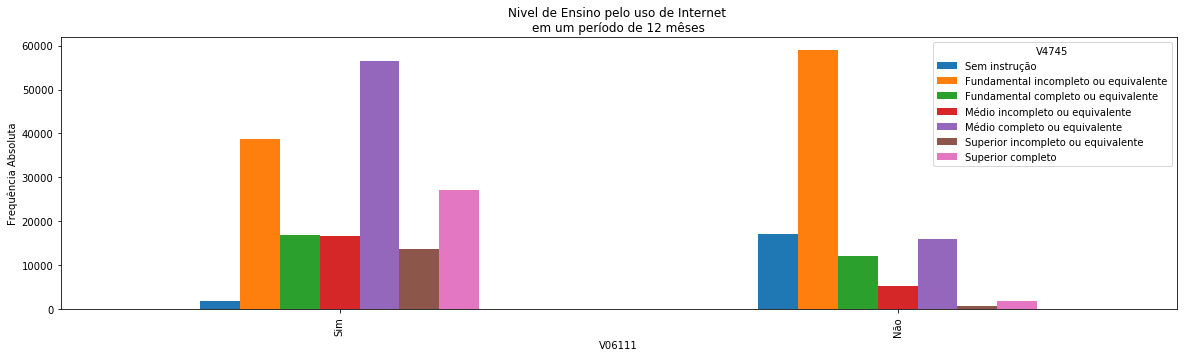

In [205]:
ct1 = pd.crosstab(dados.V06111, dados.V4745)
ct1.plot(kind='bar', figsize=(20, 5))
# color=('red','blue','green','yellow', 'salmon'),
plt.ylabel('Frequência Absoluta')
plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")

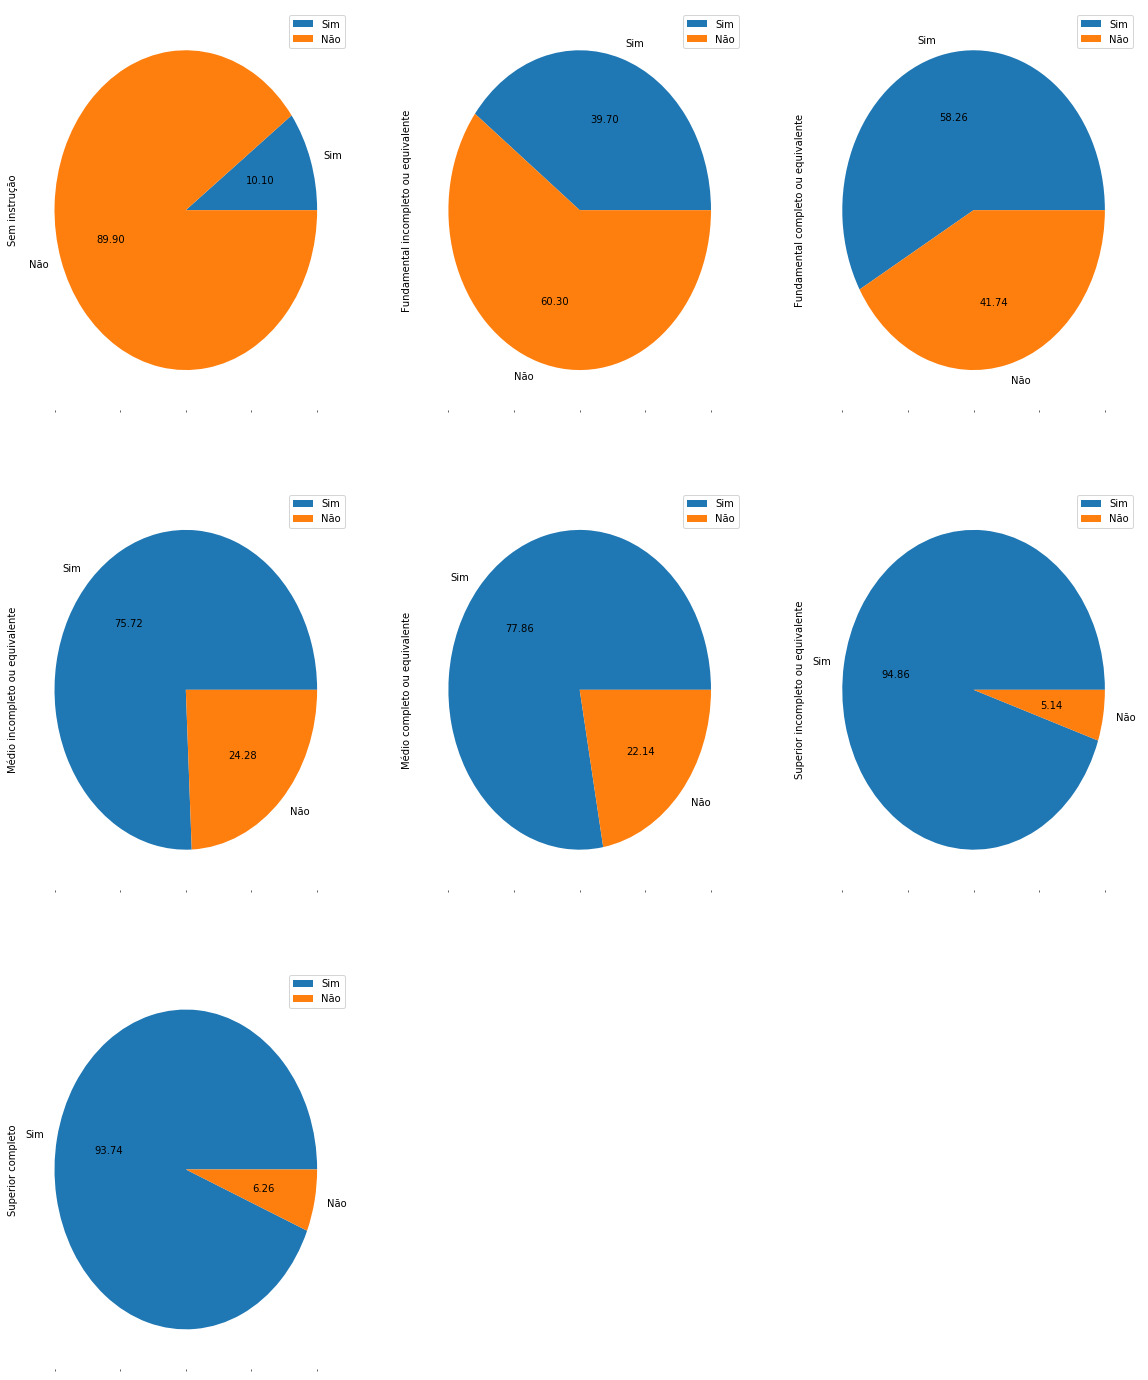

In [206]:
ct1 = pd.crosstab(dados.V06111, dados.V4745)
ct1.plot(kind='pie',subplots = True,figsize=(20, 25),layout=(3, 3),autopct="%0.2f")
# plt.ylabel('Frequência Absoluta')

plt.title("Nivel de Ensino pelo uso de Internet \nem um período de 12 mêses")

In [207]:
# # dados.V4750.describe()
# # bp = dados.V4750.boxplot()
# plot = dados.V4750.plot(kind='box',title='Expectativa de vida de países do mundo')#, color='red')
# plt.ylabel('(em anos)')
# plt.xlabel('Ano')

[]

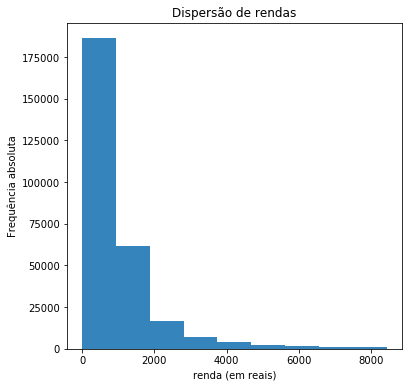

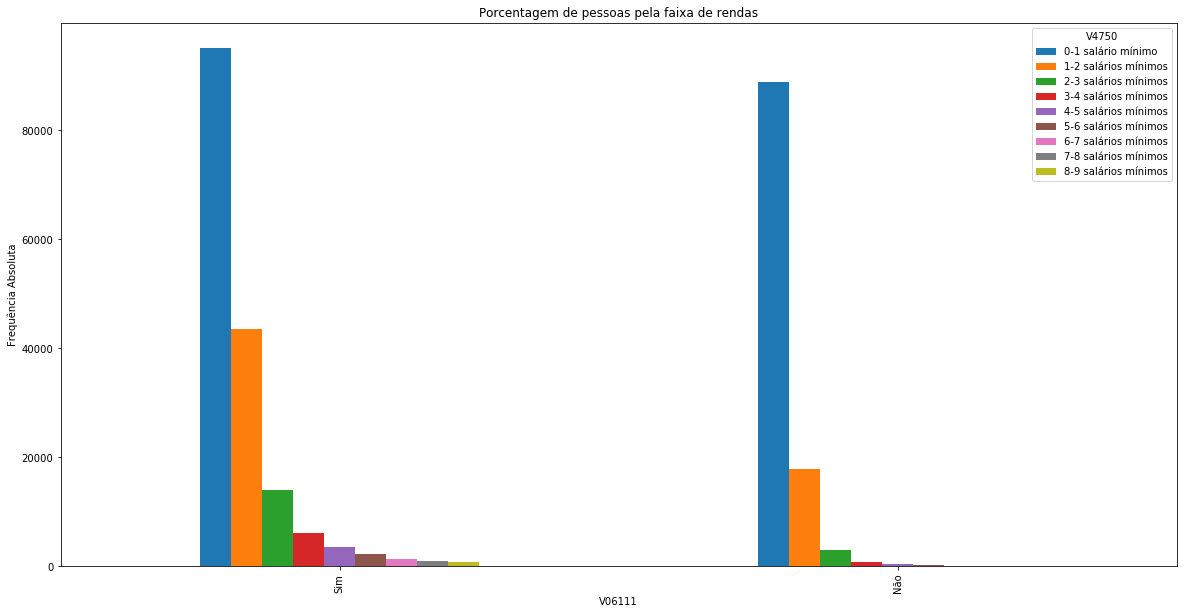

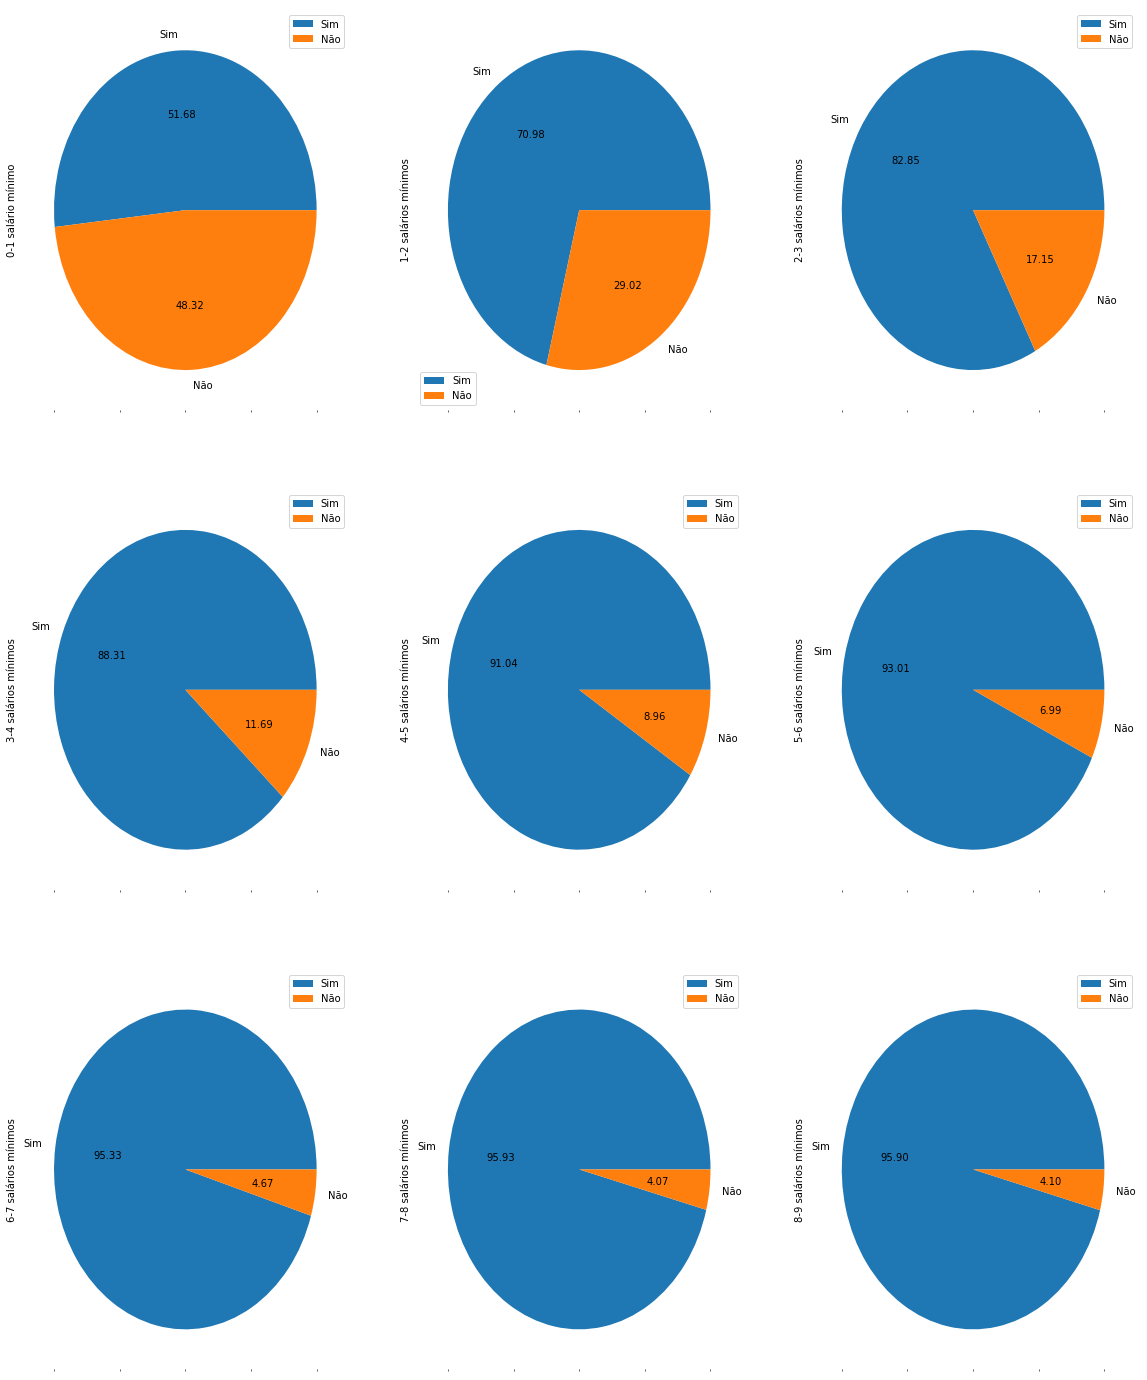

In [211]:
faixa = range(0,9370,937) # em salários mínimos

RENDA_cat = pd.cut(dados.V4750, bins=faixa)
RENDA_cat.value_counts(sort=False, normalize=True)*100

RENDA_cat = RENDA_cat.astype('category')
RENDA_cat = RENDA_cat[pd.notnull(RENDA_cat)]

# print(RENDA_cat)
RENDA_cat.cat.categories = (["0-1 salário mínimo","1-2 salários mínimos","2-3 salários mínimos","3-4 salários mínimos","4-5 salários mínimos",
"5-6 salários mínimos","6-7 salários mínimos","7-8 salários mínimos","8-9 salários mínimos"])
# ----------------------

plot = dados.V4750.plot.hist(bins=faixa,title='Dispersão de rendas', figsize=(6, 6), alpha=0.9)
plt.ylabel('Frequência absoluta')
plt.xlabel('renda (em reais)')
plt.plot()



ct1 = pd.crosstab(dados.V06111, RENDA_cat)
ct1.plot(kind='bar',figsize=(20, 10))
plt.ylabel('Frequência Absoluta')
plt.title("Número absoluto de pessoas pela faixa de rendas")
plt.plot()

# print(RENDA_cat)
plt.title("Porcentagem de pessoas pela faixa de rendas")
ct1 = pd.crosstab(dados.V06111,RENDA_cat)
ct1.plot(kind='pie',figsize=(20, 25),subplots=True,layout=(3, 3),autopct="%.2f")
# plt.ylabel('Frequência Absoluta')
plt.plot()

In [209]:
pd.crosstab([dados.V06111, dados.V4745],RENDA_cat,  margins=True)

V4750                                         0-1 salário mínimo  \
V06111 V4745                                                       
Sim    Sem instrução                                        1326   
       Fundamental incompleto ou equivalente               29188   
       Fundamental completo ou equivalente                 11498   
       Médio incompleto ou equivalente                     11897   
       Médio completo ou equivalente                       31567   
       Superior incompleto ou equivalente                   5265   
       Superior completo                                    4216   
Não    Sem instrução                                       14685   
       Fundamental incompleto ou equivalente               48071   
       Fundamental completo ou equivalente                  9033   
       Médio incompleto ou equivalente                      4432   
       Médio completo ou equivalente                       11327   
       Superior incompleto ou equivalente                    469   
       Superior completo                                     763   
All                                                       183737   

V4750                                         1-2 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                           400   
       Fundamental incompleto ou equivalente                  6855   
       Fundamental completo ou equivalente                    3863   
       Médio incompleto ou equivalente                        3309   
       Médio completo ou equivalente                         16909   
       Superior incompleto ou equivalente                     4568   
       Superior completo                                      7641   
Não    Sem instrução                                          2016   
       Fundamental incompleto ou equivalente                  8765   
       Fundamental completo ou equivalente                    2300   
       Médio incompleto ou equivalente                         638   
       Médio completo ou equivalente                          3344   
       Superior incompleto ou equivalente                      192   
       Superior completo                                       545   
All                                                          61345   

V4750                                         2-3 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                            93   
       Fundamental incompleto ou equivalente                  1329   
       Fundamental completo ou equivalente                     777   
       Médio incompleto ou equivalente                         645   
       Médio completo ou equivalente                          4289   
       Superior incompleto ou equivalente                     1783   
       Superior completo                                      5072   
Não    Sem instrução                                           197   
       Fundamental incompleto ou equivalente                  1177   
       Fundamental completo ou equivalente                     406   
       Médio incompleto ou equivalente                         113   
       Médio completo ou equivalente                           749   
       Superior incompleto ou equivalente                       41   
       Superior completo                                       212   
All                                                          16883   

V4750                                         3-4 salários mínimos  \
V06111 V4745                                                         
Sim    Sem instrução                                            26   
       Fundamental incompleto ou equivalente                   420   
       Fundamental completo ou equivalente                     223   
       Médio incompleto ou equivalente                         219   
       Médio completo ou equivalente     